## Special Distribution -> HyperGeometric

A manufacturer receives a shipment of 100 parts from a vendor. 
The shipment will be unacceptable if more than five of the parts are defective. 

The manufacturer is going to randomly select K parts from the shipment for inspection, and the shipment will be accepted if no defective parts are found in the sample.


Question 1. How large does K have to be to ensure that the probability that the manufacturer accepts an
unacceptable shipment is less than 0.1?

Question 2. Now suppose that the manufacturer decides to accept the shipment if there is at most one defective part in the sample. How large does  𝐾  have to be to ensure that the probability that the manufacturer accepts an unacceptable shipment is less than 0.1? As above, a shipment is unacceptable if there are more than 5 defective parts.

In [3]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np

### Plot CDF for different K's 
Question 1 Answer is K=32




Question 2 Answer is K = 51

K =  20
[0.25208640157093853, 0.6554246440844385, 0.907511045655377, 0.9860834305606045, 0.9989269934778052, 0.9999674846508443, 1.0]


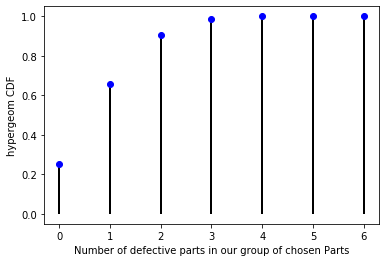

K =  32
[0.09181923881869476, 0.37164929998043245, 0.7105060146684741, 0.9190332237072701, 0.9877524175950547, 0.9992398052300276, 1.0]


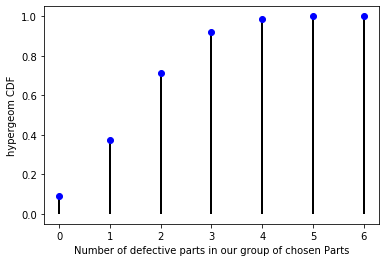

K =  42
[0.03395434462444756, 0.19539764359351874, 0.5018409425625892, 0.79899808095684, 0.9542096219931224, 0.995599366269464, 1.0]


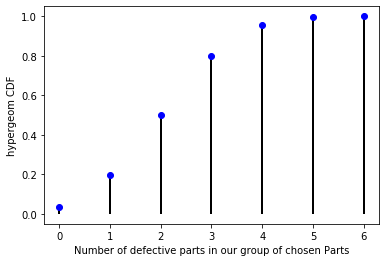

K =  50
[0.013330538154195019, 0.10220079251549594, 0.3388661438037419, 0.6611338561962493, 0.8977992074844954, 0.9866694618457963, 1.0]


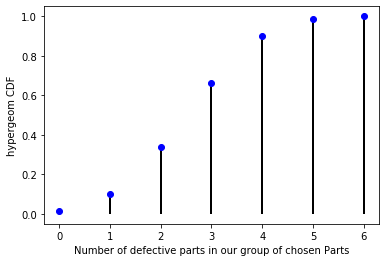

K =  51
[0.011730873575691678, 0.09331376707936573, 0.3199329157006849, 0.6417977934527037, 0.8883325934329722, 0.9848920567585772, 1.0]


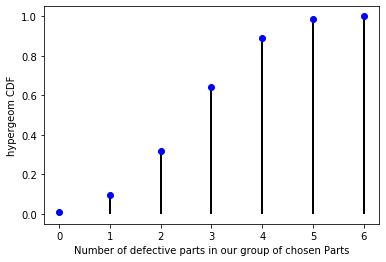

K =  52
[0.01029444007662742, 0.08498898202796974, 0.3014333933642464, 0.6220917805291056, 0.878269948535811, 0.9829214554662098, 1.0]


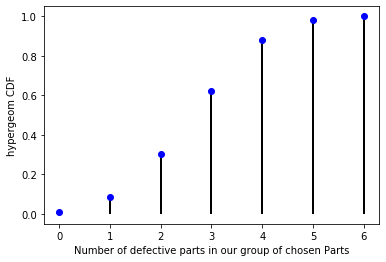

K =  54
[0.007857724207425774, 0.06995291062708314, 0.26584843921290735, 0.5817109969326845, 0.8562960613140804, 0.978333867705813, 1.0]


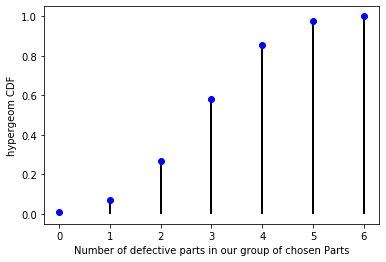

K =  60
[0.003219975900388221, 0.03633972801866703, 0.1720387123921697, 0.4556618148665197, 0.7747378051501647, 0.9580019636720521, 1.0]


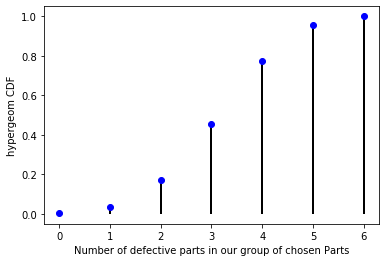

In [36]:
Ks = [20,32,42,50,51,52,54,60]
for k in Ks:
    print("K = ",k)
    [M, n, N] = [100, 6, k]
    rv = hypergeom(M, n, N)
    x = np.arange(0, n+1)
    pmf_dogs = rv.cdf(x)
    print(list(pmf_dogs))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, pmf_dogs, 'bo')
    ax.vlines(x, 0, pmf_dogs, lw=2)
    ax.set_xlabel('Number of defective parts in our group of chosen Parts')
    ax.set_ylabel('hypergeom CDF')
    plt.show()

## Special Distribution -> Poisson

Let the number of chocolate chips in a certain type of cookie have a Poisson distribution. 
We want the probability that a randomly chosen cookie has at least two chocolate chips to be greater than 0.99. For which of the following values of the mean of the distribution is this condition assured?

6
X =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
PMF for X [0.01487251 0.04461754 0.08923508 0.13385262 0.16062314 0.16062314
 0.13767698 0.10325773 0.06883849 0.04130309 0.02252896]


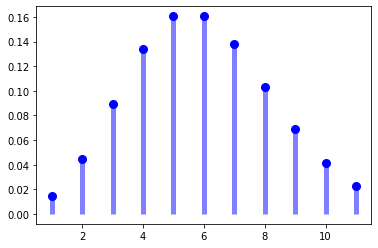

7
X =  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
PMF for X [0.02234111 0.05212925 0.09122619 0.12771667 0.14900278 0.14900278
 0.13037743 0.10140467 0.07098327 0.04517117 0.02634985 0.01418838]


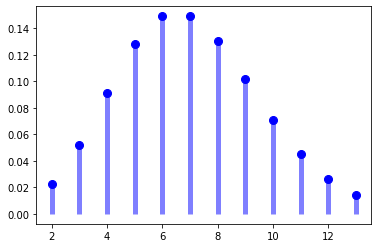

8
X =  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
PMF for X [0.0107348  0.02862614 0.05725229 0.09160366 0.12213822 0.13958653
 0.13958653 0.12407692 0.09926153 0.07219021 0.0481268  0.02961649
 0.01692371]


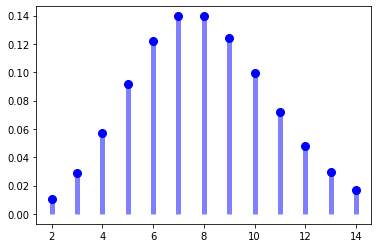

9
X =  [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
PMF for X [0.01499429 0.03373716 0.06072688 0.09109032 0.11711612 0.13175564
 0.13175564 0.11858008 0.09702006 0.07276505 0.0503758  0.03238444
 0.01943067 0.01092975]


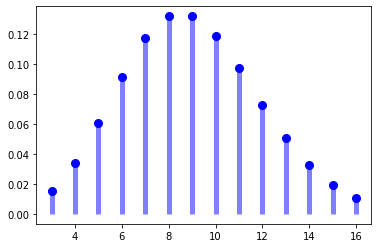

In [64]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 1)

mus = [6,7,8,9]
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

for mu in mus:
    print(mu)
    x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
    plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
    print("X = ",x)
    print("PMF for X",poisson.pmf(x, mu))
    plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
    


#     rv = poisson(mu)
#     plt.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
#     plt.legend(loc='best', frameon=False)
    plt.show()

## Estimators Through Simulation

Now we are going to perform some simulations in  Python . 


We are going to follow example from the lecture where we imagine a case where the $x_{i}$   follow a uniform distribution between  0  and  𝜃(𝑈[0,𝜃]) , and two researchers are trying to figure out the value of  𝜃 . 

(We will set  𝜃=5  ). We are going to simulate different random samples from this distribution with a sample size of 100 observations each.  

These samples will be available to the two researchers, and we are going to plot how  𝜃̂   is distributed for different estimators.  



In [142]:
uniform_numbers = np.random.uniform(low=0.0,high = 5.0,size=100000)

There are two types of researchers in this world. 

Researcher  𝐴  uses as an estimator for  𝜃 , $𝜃̂ _{A}$ =  2∗$\bar{x}$ , where  $\bar{x}$  corresponds to the sample mean of the sample he receives from us. 

Researcher  𝐵  uses as an estimator $ 𝜃̂ _{B}$=2∗median(𝑥) , where  median(𝑥)  corresponds to the median of the sample he receives from us.

### Researcher A  

In [ ]:
from random import sample
import seaborn as sns
a_list = []
for i in range(40):
    a_list.append(sample(list(uniform_numbers),100))
print("Length of Samples",len(a_list))

element_list_mean = []
for ele in a_list:
    element_list_mean.append(2*np.mean(ele))
print("Mean= "+ str(np.mean(element_list_mean))+"  ,SD= "+str(np.std(element_list_mean)))
sns.kdeplot(element_list_mean,shade=True)

### Researcher B

In [ ]:
element_list_median = []
for ele in a_list:
    element_list_median.append(2*np.median(ele))
print("Mean= "+ str(np.mean(element_list_median))+"  ,SD= "+str(np.std(element_list_median)))
sns.kdeplot(element_list_median,shade=True)

### Researcher C 

Estimation through Order Statistics 

Mean= 4.943663025545608  ,SD= 0.06737370886563179


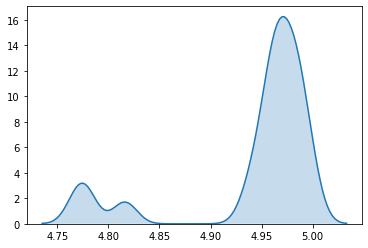

In [151]:
element_list_order_stats = []
for ele in a_list:
    element_list_order_stats.append(np.max(ele))
print("Mean= "+ str(np.mean(element_list_order_stats))+"  ,SD= "+str(np.std(element_list_order_stats)))
sns.kdeplot(element_list_order_stats,shade=True)

Researcher_A  Mean= 4.995784953801314  ,SD= 0.3287851486700306
Researcher_B  Mean= 4.968537940177594  ,SD= 0.5980660348418559
Researcher_C Mean= 4.943663025545608  ,SD= 0.06737370886563179


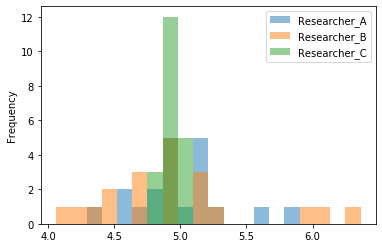

In [154]:
import pandas as pd
print("Researcher_A  Mean= "+ str(np.mean(element_list_mean))+"  ,SD= "+str(np.std(element_list_mean)))
print("Researcher_B  Mean= "+ str(np.mean(element_list_median))+"  ,SD= "+str(np.std(element_list_median)))
print("Researcher_C Mean= "+ str(np.mean(element_list_order_stats))+"  ,SD= "+str(np.std(element_list_order_stats)))
pd.DataFrame({"Researcher_A": element_list_mean,"Researcher_B": element_list_median,"Researcher_C": element_list_order_stats}).plot(kind="hist",alpha=0.5
                                                                                                                                    ,bins=20);


### Conclusion

Since both of the estimators are centered around the real value of the parameter  𝜃 , We should use the estimator with the lowest variance